# Results from training

Below you see results from training. Training was performed for 10 000 episodes except the c51 distributional which there was some problems with. 

Results are nice and expected in most cases, with the exceptions of c51 distributional and multi-step, more on that below. 

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Color map
Blue_1 = '#2CBDFE'
Green1 = '#47DBCD'
Pink1 = '#F3A0F2'
Purple1 = 'yellow'
Violet1 = '#661D98'
Amber1 = '#F5B14C'
color_list =[Blue_1, Green1, Pink1, Purple1, Violet1, Amber1]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

file_names = {'dqn': 'dqn_3.txt',
             'ddqn': 'double_dqn_4.txt',
             'per': 'per_dqn_3.txt',
             'dueling': 'dueling_dqn_4.txt',
             'm_step': 'multi_step_dqn_4.txt',
             'c51': 'distributional_dqn_4.txt'
             }

def get_results(file_names, smoothing=500):
    '''Obtains txt files of training results
    
    Arguments:
    file_names: dict of plotting names and filenames.
    smoothing: int or float, mber of neighboring points to average.
    
    Returns: results: list of results.
    '''
    results = []
    for file_name in file_names.values():
        with open(file_name, 'r') as file:
            file = file.read()
        file = [float('-' + i) for i in file[1:].split('-')]
        file = [np.average(file[i:i+smoothing]) for i in range(len(file) - 100)]
        results.append(file)
    return results

## The successful ones

DQN, DoubleDQN, PrioritizedMemoryReplayDQN and DuelingDQN all performed.  

I is interesting to note how the trajectories of the curves mirrors the sequence in which the articles that presented these algorithms came to be. DDQN were first up after DQN. Then came the PERDQN which was built upon DDQN. And then the DuelingDQN which made use of DDQN aswell PERDQN. 

Furthermore, note how they are all quite even short and mid term, sometimes even outpaced by the DQN. At the end though the PERDQN and DuleingDQN really shines. This might, among other things, have to do with the importance sampling weights kicking in as they get more impactful as the episodes elapses.

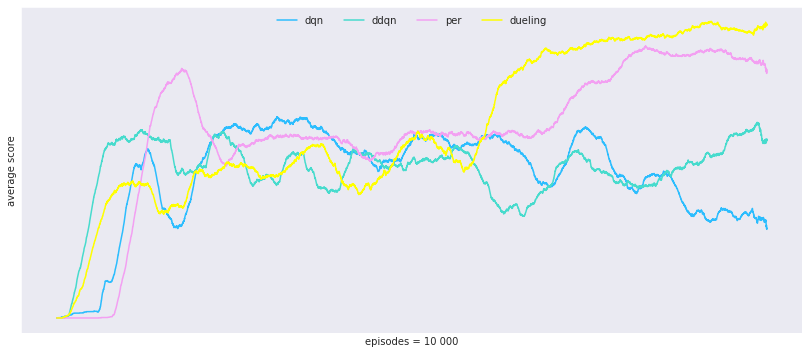

In [41]:
results = get_results(file_names)
sns.set_style('darkgrid')
plt.figure(figsize=(14, 6))
for result, file_name in zip(results[:4], list(file_names.keys())[:4]):
    plt.plot(result, label=file_name)
plt.xticks([])
plt.yticks([])
plt.xlabel('episodes = 10 000')
plt.ylabel('average score')
plt.legend(loc='upper center', frameon=False, ncol=6)
plt.show()

## The trickier ones

I simply could not get the multi-step to deliver any results to speak of. There was at least learning detected but was just so small. This could depend on a number of things. The sampling from memory buffer procedure comes high on that list. So does handling of current and target states in the update and so on. It is doable but didn't have the time to experiment that long with single algorithm.

The c51 was also quite unstable to train, i was not able to get any results from it but im pretty sure that with a little more time it would not be a problem.

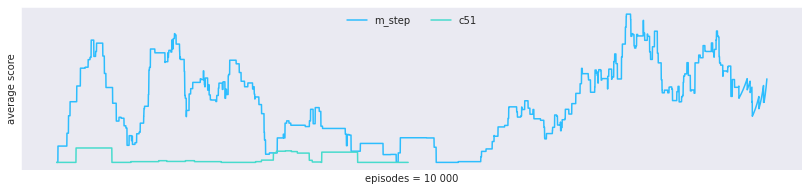

In [47]:
results = get_results(file_names)
sns.set_style('darkgrid')
plt.figure(figsize=(14, 3))
for result, file_name in zip(results[4:], list(file_names.keys())[4:]):
    plt.plot(result, label=file_name)
plt.xticks([])
plt.yticks([])
plt.xlabel('episodes = 10 000')
plt.ylabel('average score')
plt.legend(loc='upper center', frameon=False, ncol=6)
plt.show()

## And here they all are

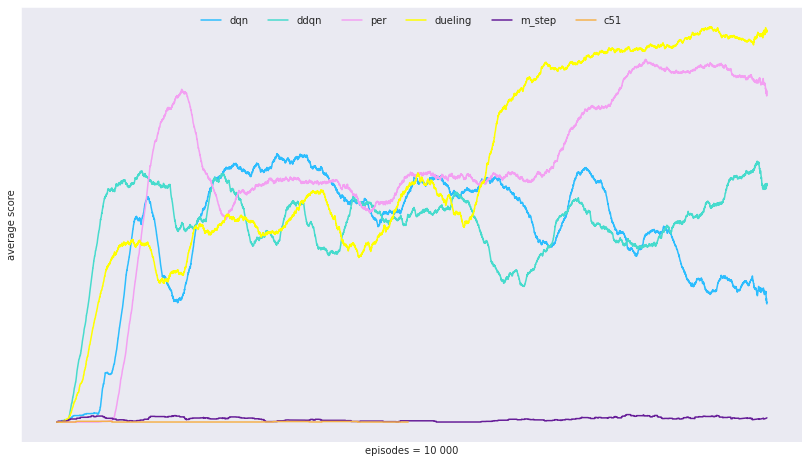

In [50]:
results = get_results(file_names)
sns.set_style('darkgrid')
plt.figure(figsize=(14, 8))
for result, file_name in zip(results, file_names.keys()):
    plt.plot(result, label=file_name)
plt.xticks([])
plt.yticks([])
plt.xlabel('episodes = 10 000')
plt.ylabel('average score')
plt.legend(loc='upper center', frameon=False, ncol=6)
plt.show()